Name : Dishali Vivek Bhoir

Class : CS-AIML

Roll No : 08

PRN : 12210320

**Title :** Select a suitable use case and implement various classification algorithms, Conduct a comparative analysis of the performance of each algorithm using metrics such as accuracy, precision, recall, F1-score, and AUC-ROC. Based on the results, determine which algorithm performs best for the chosen use case and provide a rationale for this conclusion, highlighting the strengths and weaknesses of each model in the context of the dataset.

**Dataset :** IBM HR Analytics Employee Attrition & Performance [Link](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data)

**Dataset Description :** In the business world, employee attrition refers to the loss of employees over time, either voluntarily (through resignation) or involuntarily (due to layoffs or termination). High rates of attrition can be both costly and disruptive for companies, as they lead to increased expenses related to recruitment, training, and the loss of experienced talent.

Understanding the key drivers behind employee attrition empowers organizations to implement effective retention strategies and foster a more satisfying workplace.

**Link to colab nootebook :** https://colab.research.google.com/drive/1_OYx-e8ohB1fnZBt4lAjXnbEt8otynGg?usp=sharing

Importing needed libraries

In [ ]:
# For data manipulation and analysis
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  # For interactive plotting with Plotly

# Handling warnings
import warnings

# For splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# For preprocessing the data: Label Encoding and Standard Scaling
from sklearn.preprocessing import LabelEncoder, StandardScaler

# For building models
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.neighbors import KNeighborsClassifier   # K-Nearest Neighbors model

# For evaluating models
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# For checking data skewness
from scipy.stats import skew

# Additional Plotly imports for advanced plotting and graph creation
import plotly.express as px  # Repeated import of Plotly for consistency
import plotly.graph_objects as go  # For creating detailed graphs
import math
from plotly.subplots import make_subplots  # For creating subplots in Plotly
from numpy import linalg as LA  # Linear algebra functions for advanced computations# Feature selection
from sklearn.feature_selection import RFE  # Recursive Feature Elimination for feature selection

# Data splitting again (re-import, same as above)
from sklearn.model_selection import train_test_split

# Support Vector Machine for classification
from sklearn.svm import SVC

# For resampling and dealing with imbalanced datasets
from sklearn.utils import resample


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier


warnings.filterwarnings('ignore')

Loading the DataSet

In [ ]:
df = pd.read_csv('/content/HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Data Exploration

In [ ]:
df.shape

(1470, 35)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [ ]:
df['Attrition'].nunique()

2

Data Cleaning & Reduction

In [ ]:
df.drop(columns = ['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1, inplace=True)

Exploratory Data Analysis

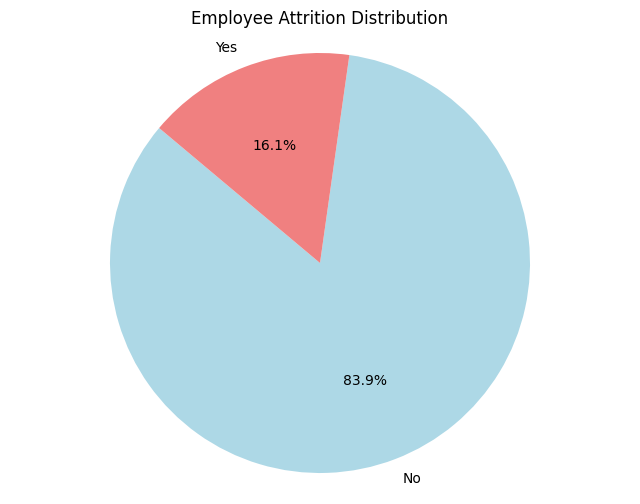

In [ ]:
# distribution of employee attrition

attrition_counts = df['Attrition'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title('Employee Attrition Distribution')
plt.axis('equal')
plt.show()

imbalance data

Univariate Analysis on numerical columns

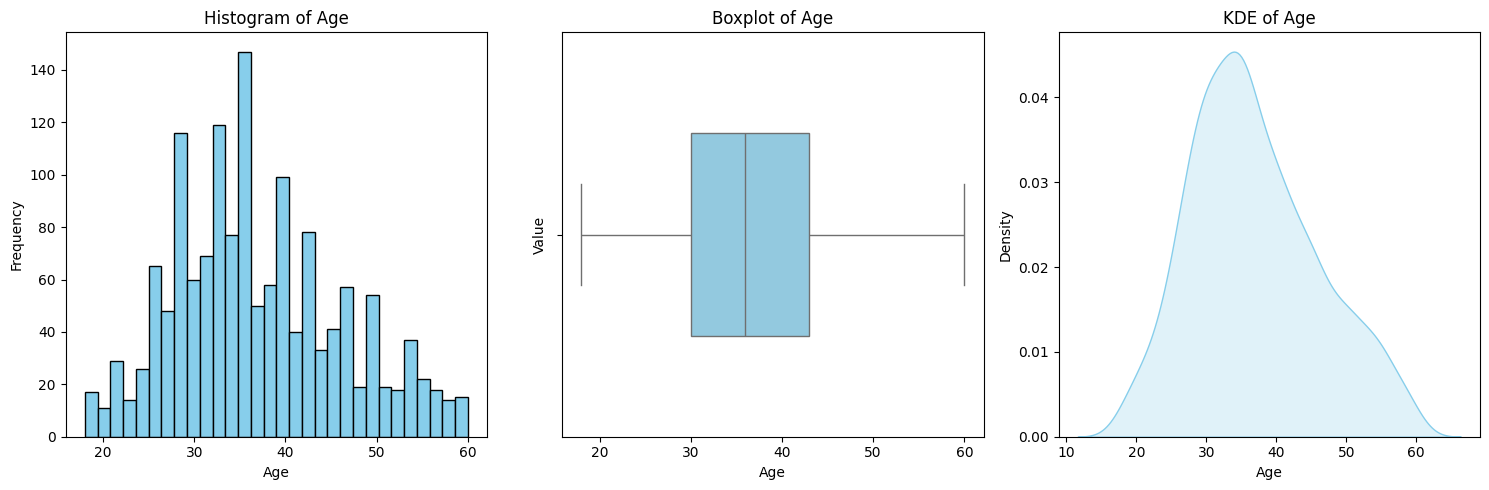

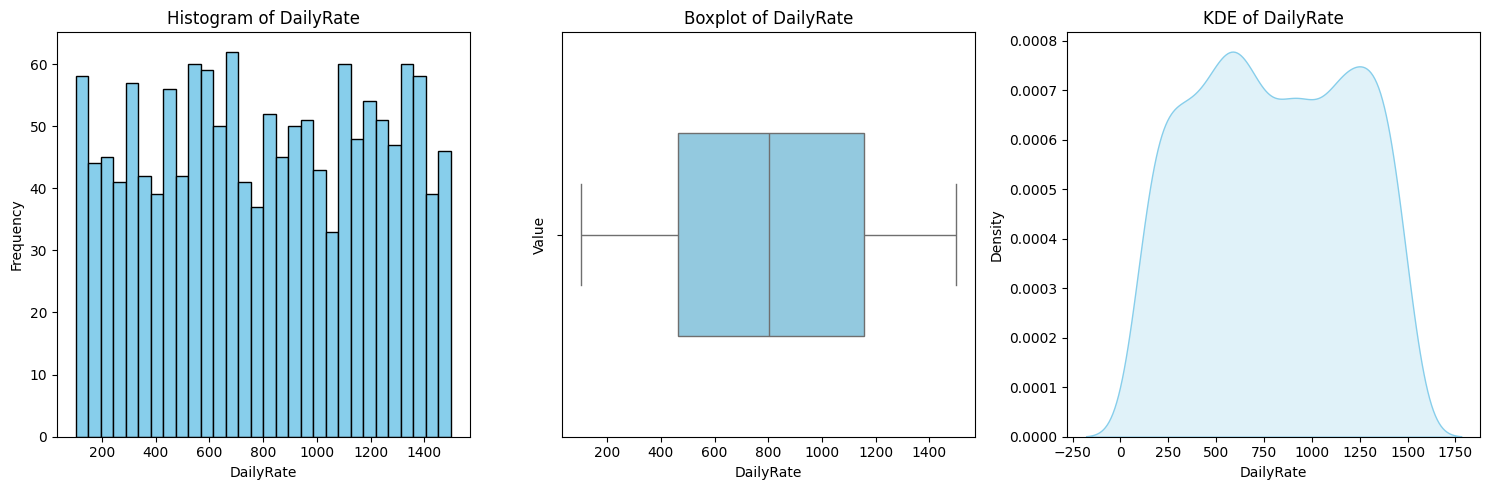

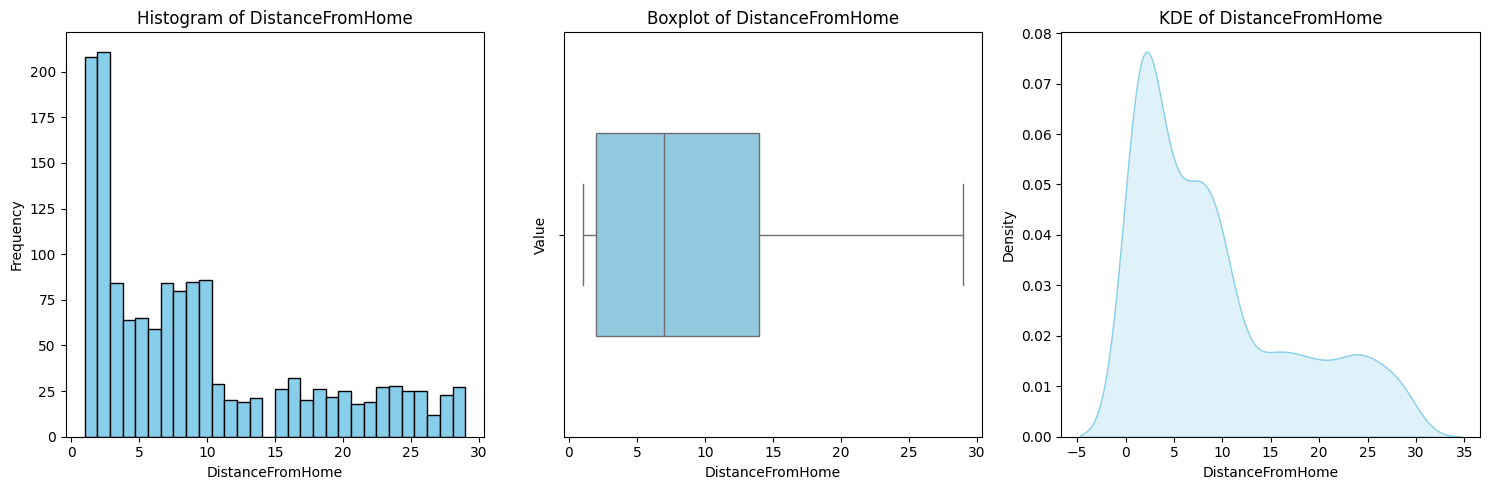

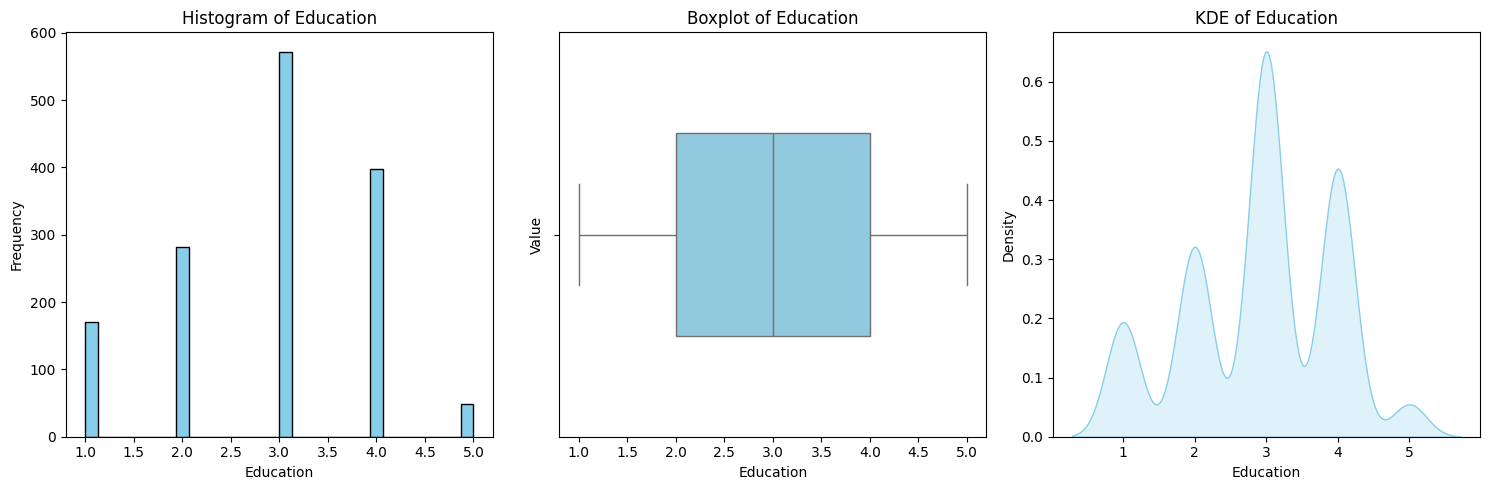

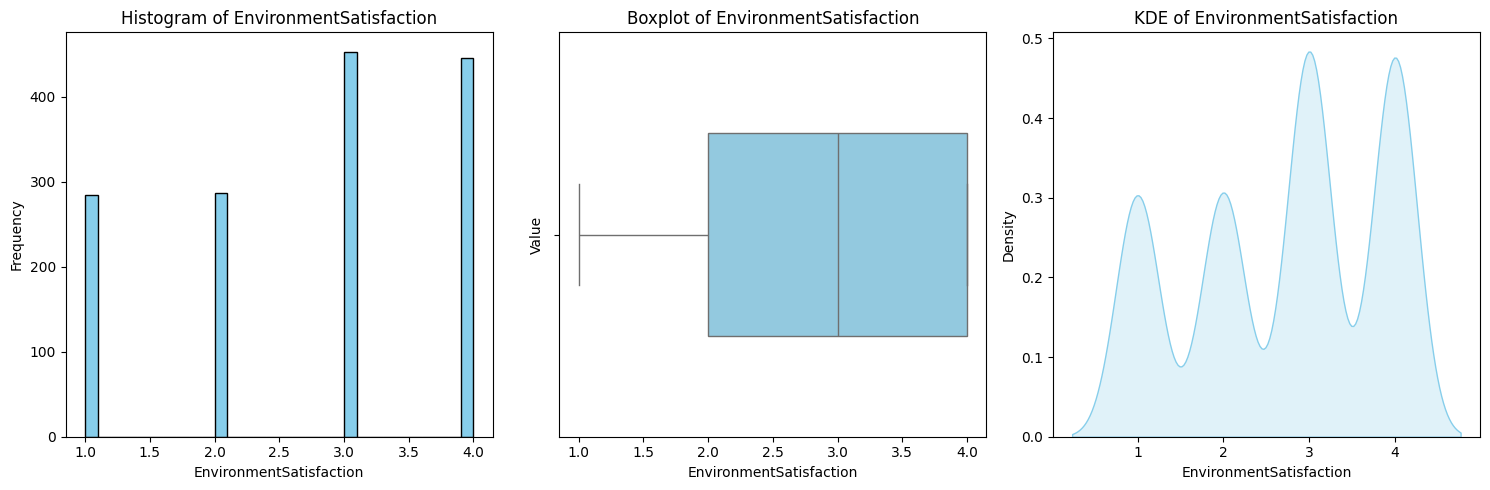

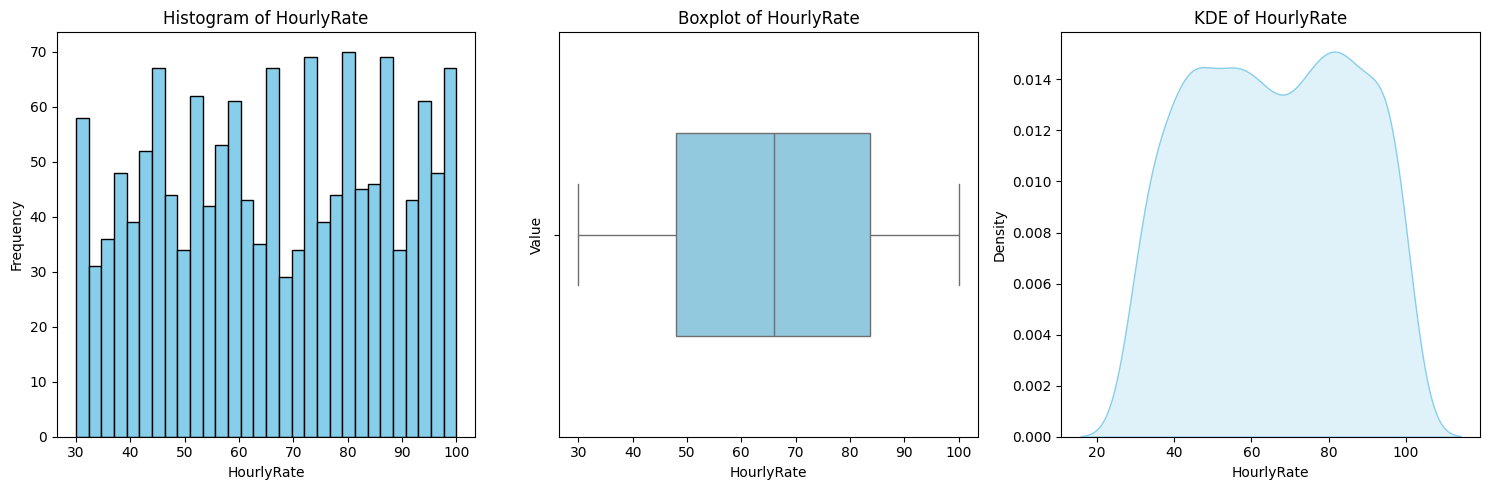

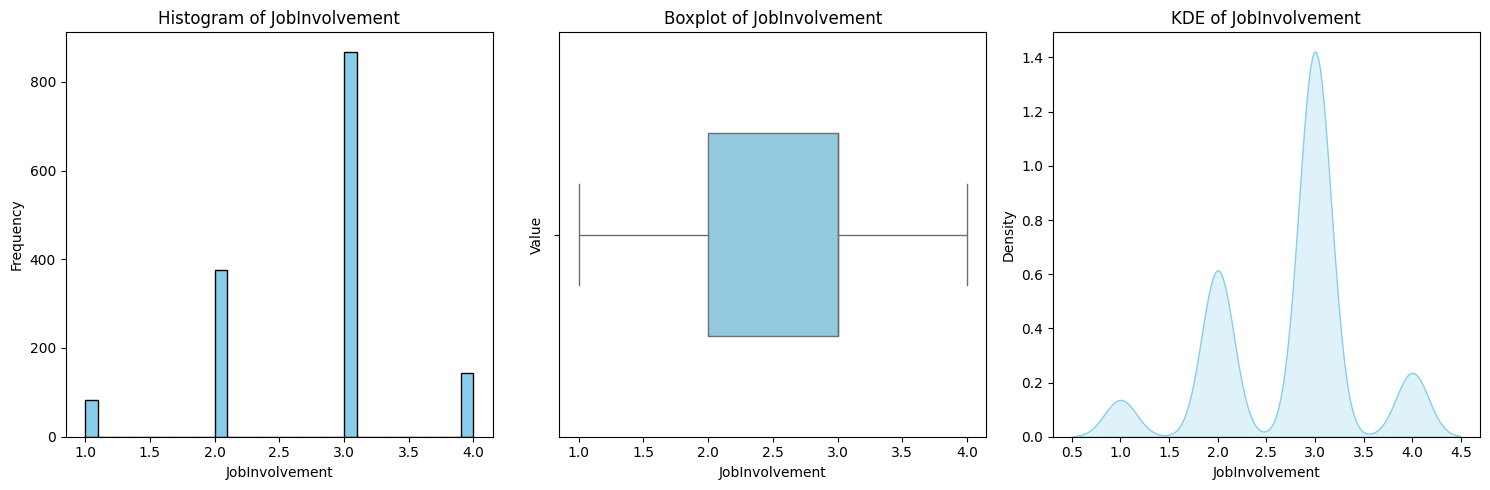

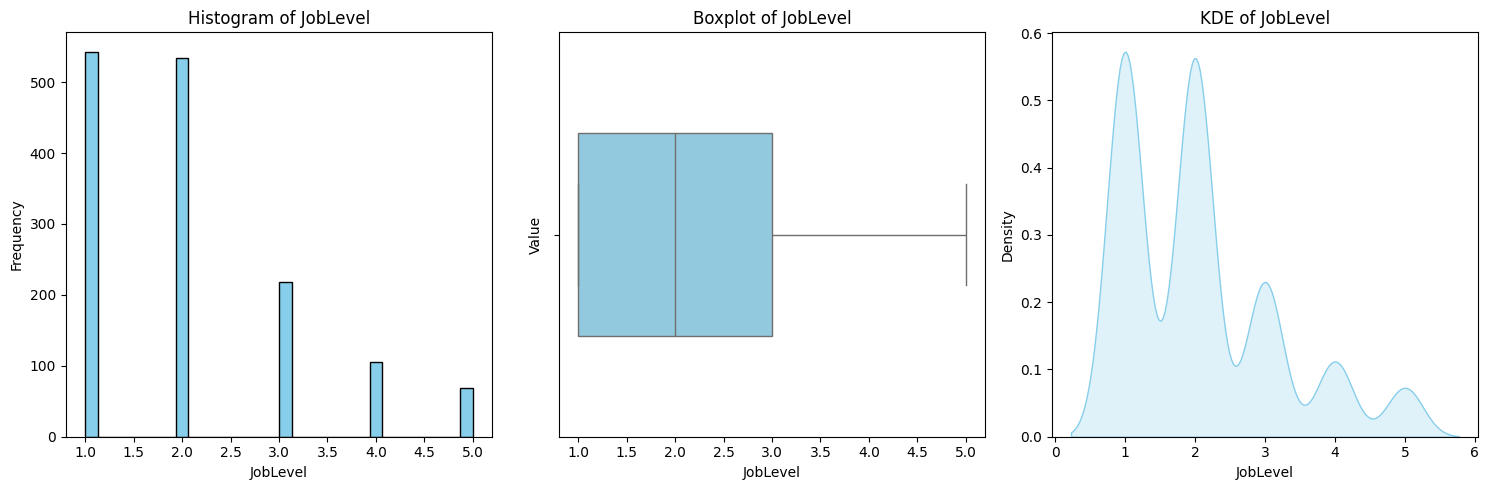

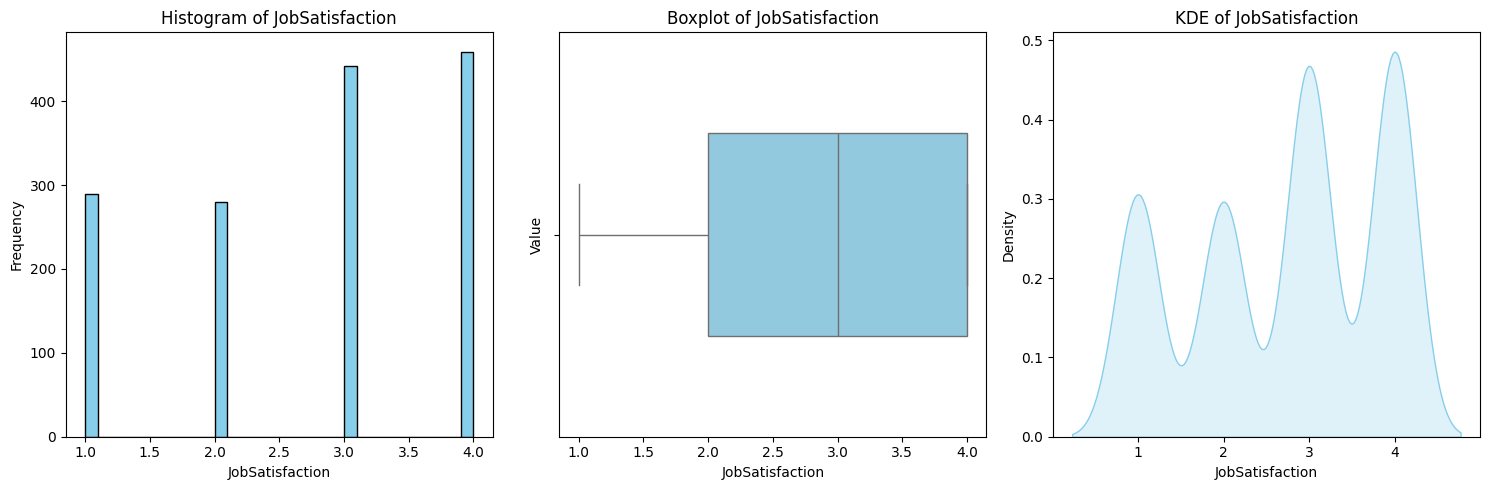

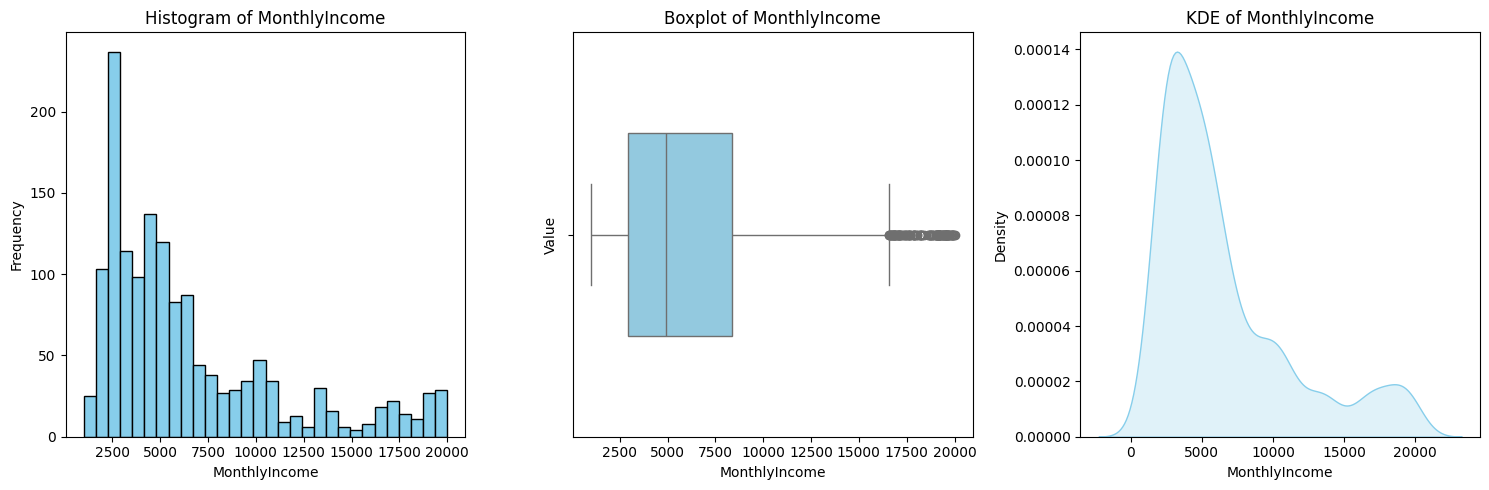

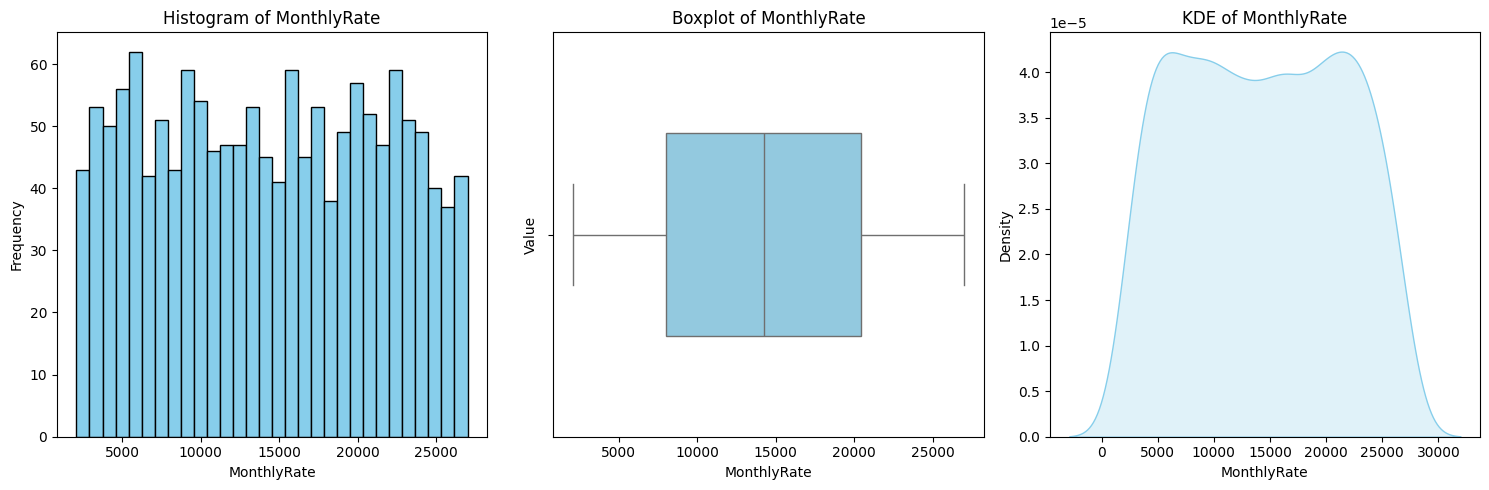

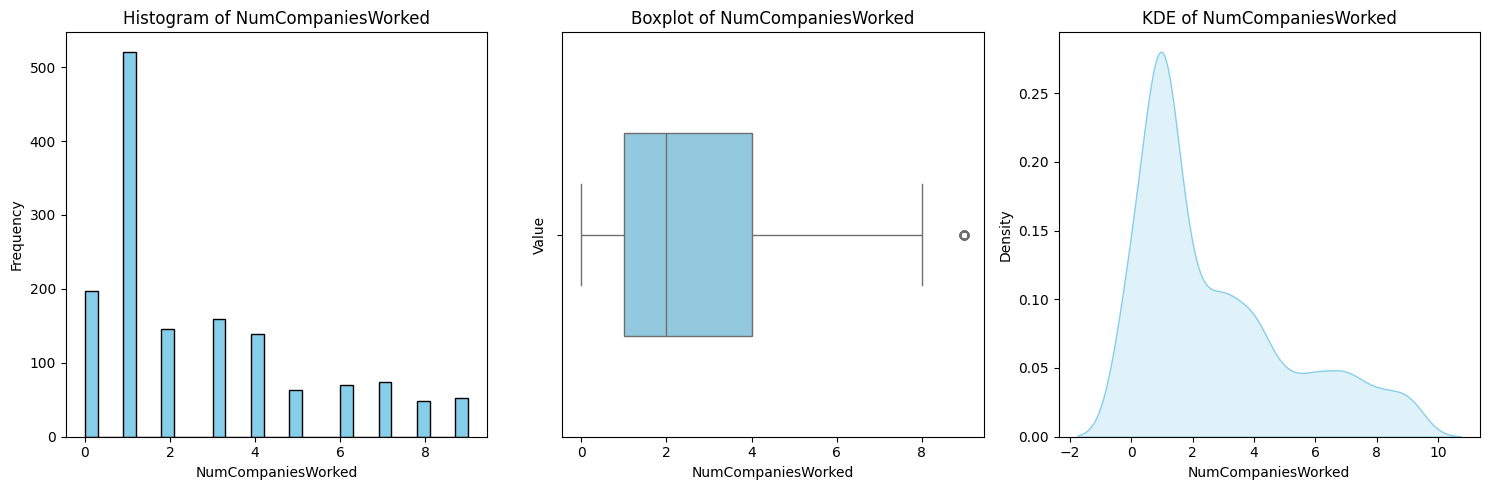

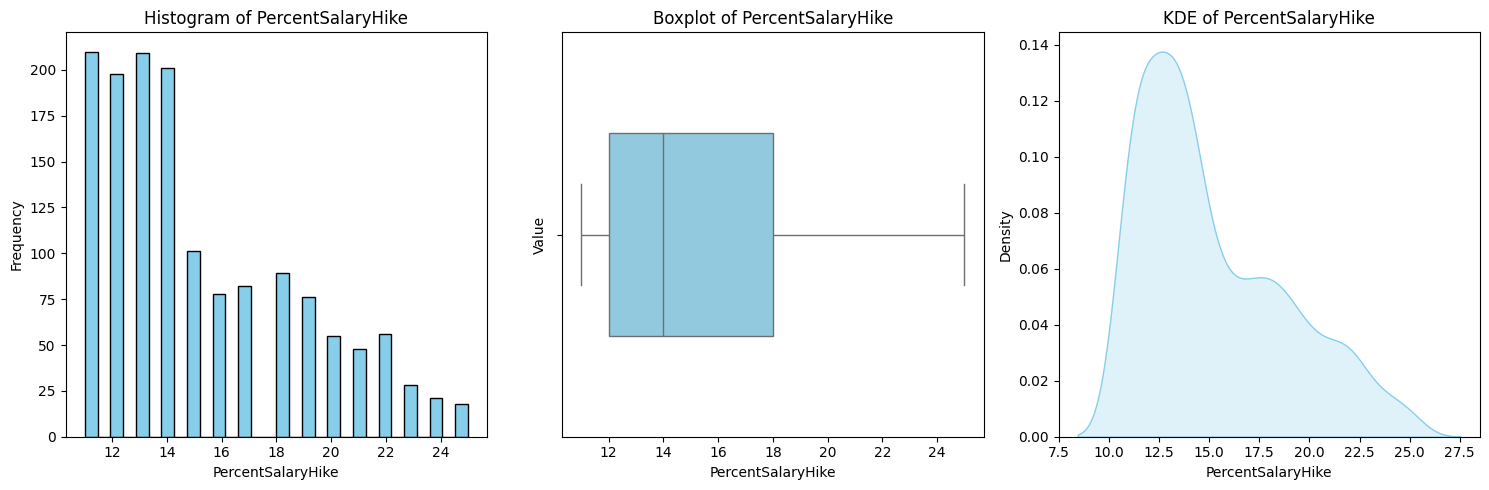

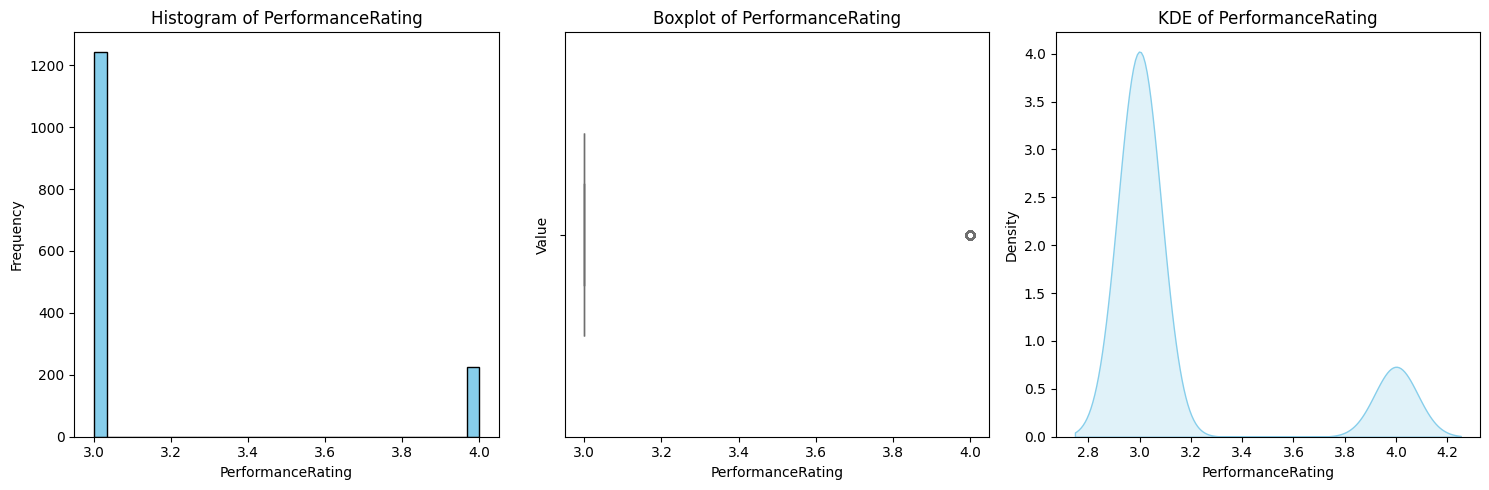

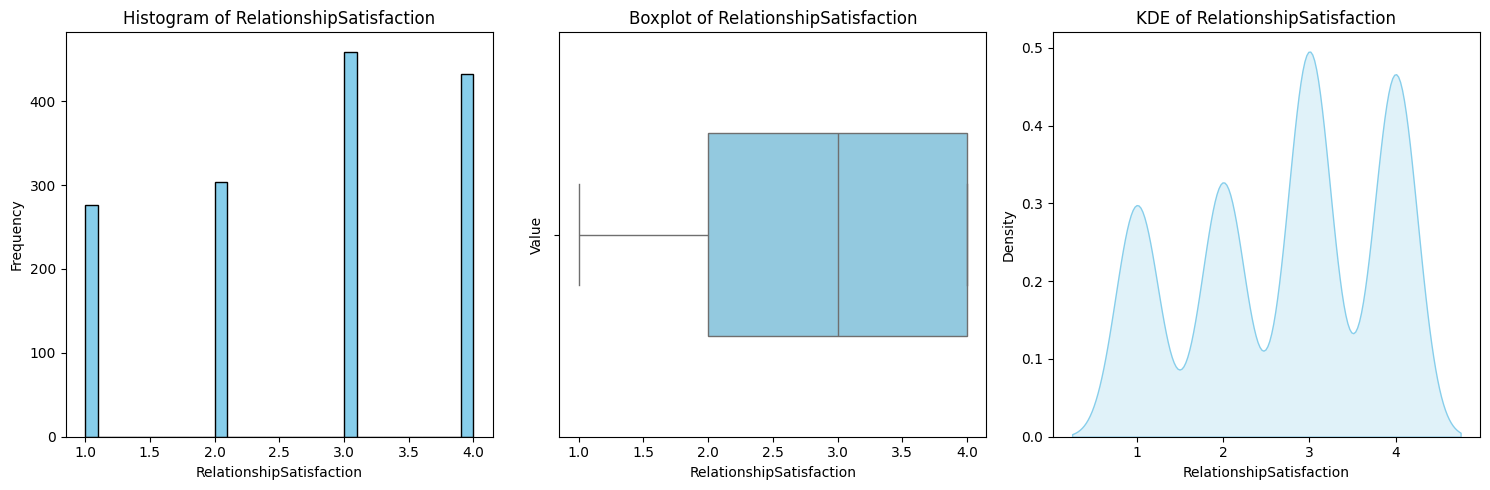

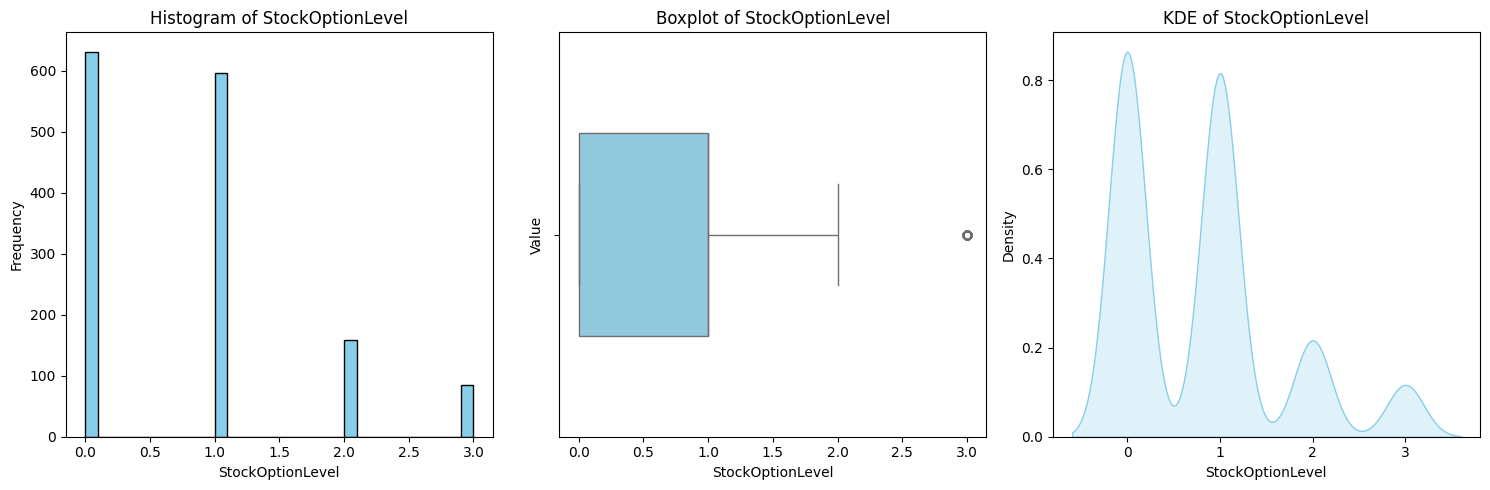

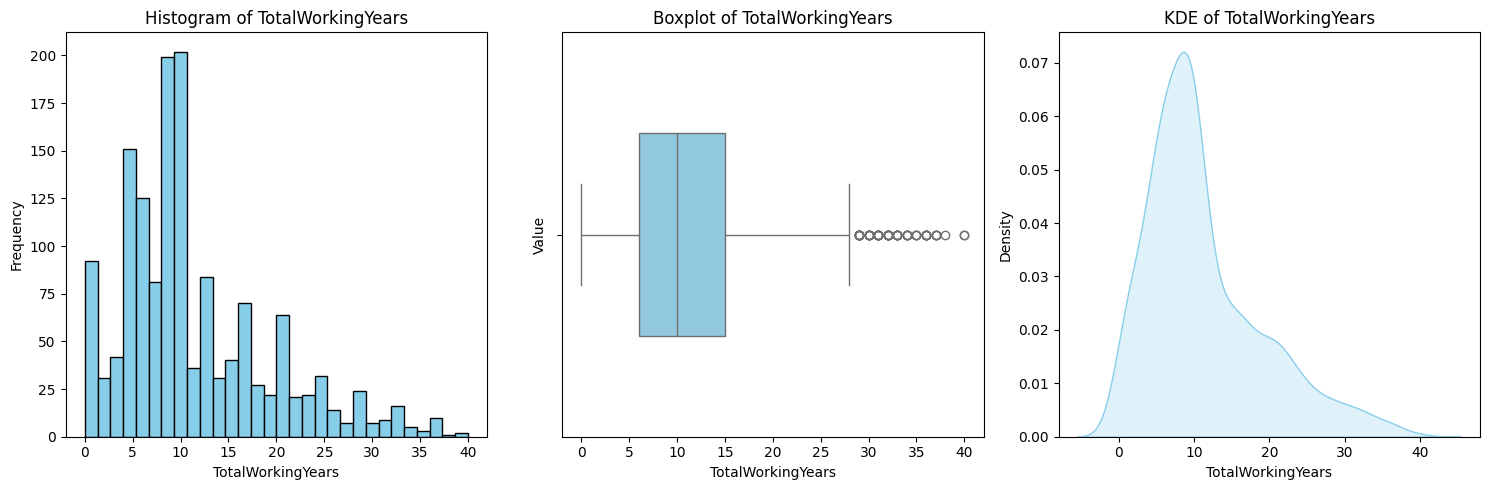

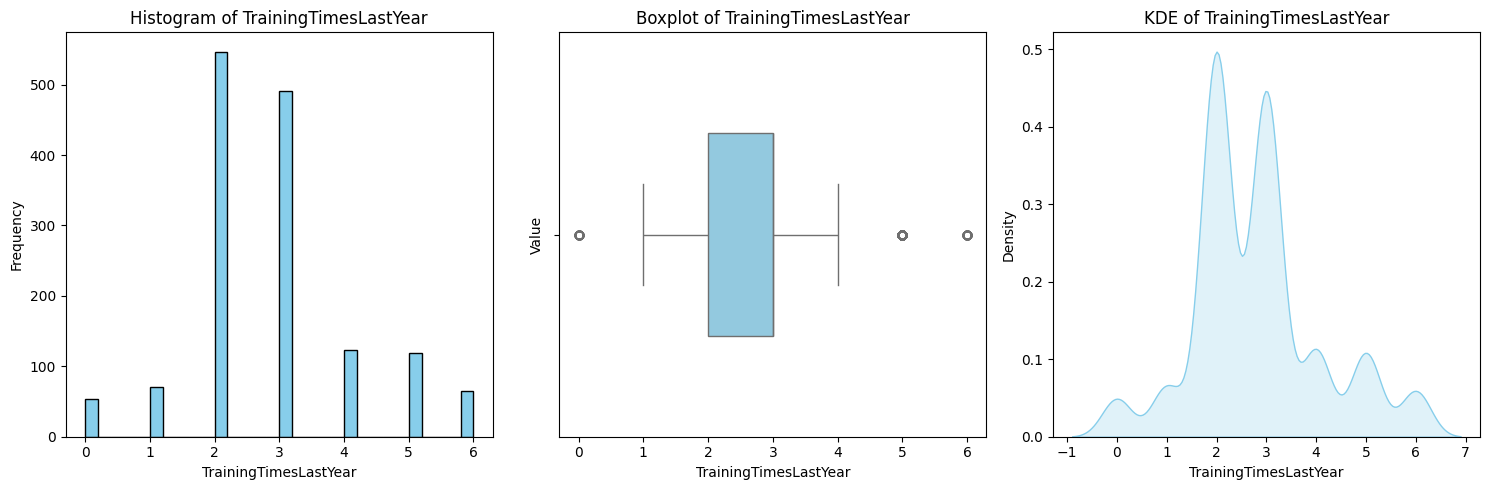

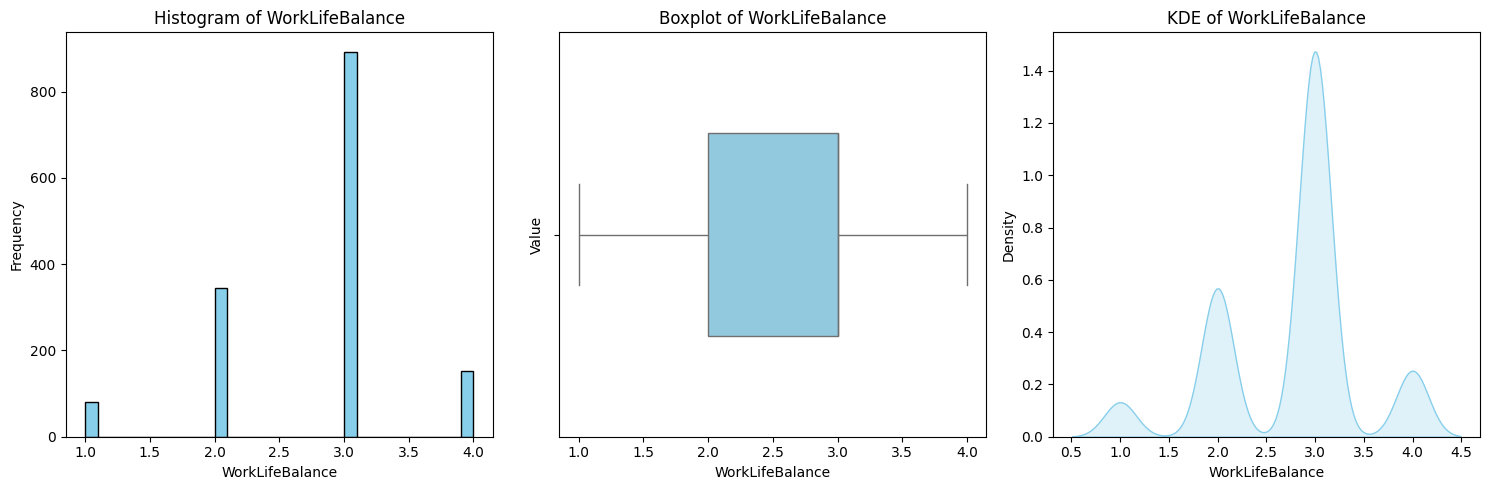

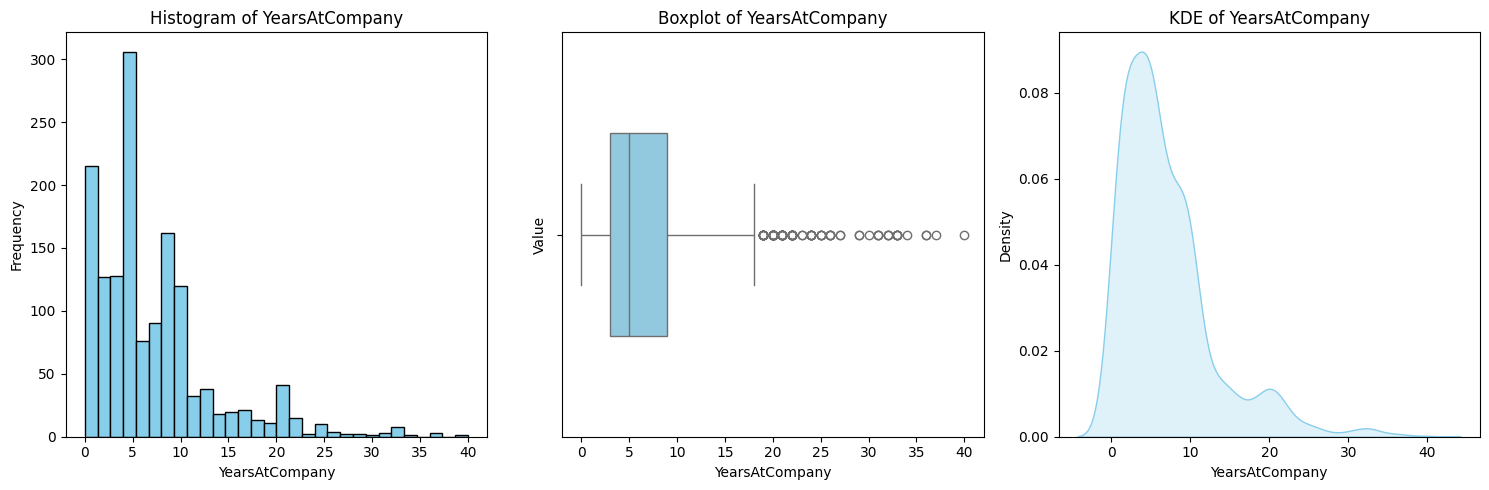

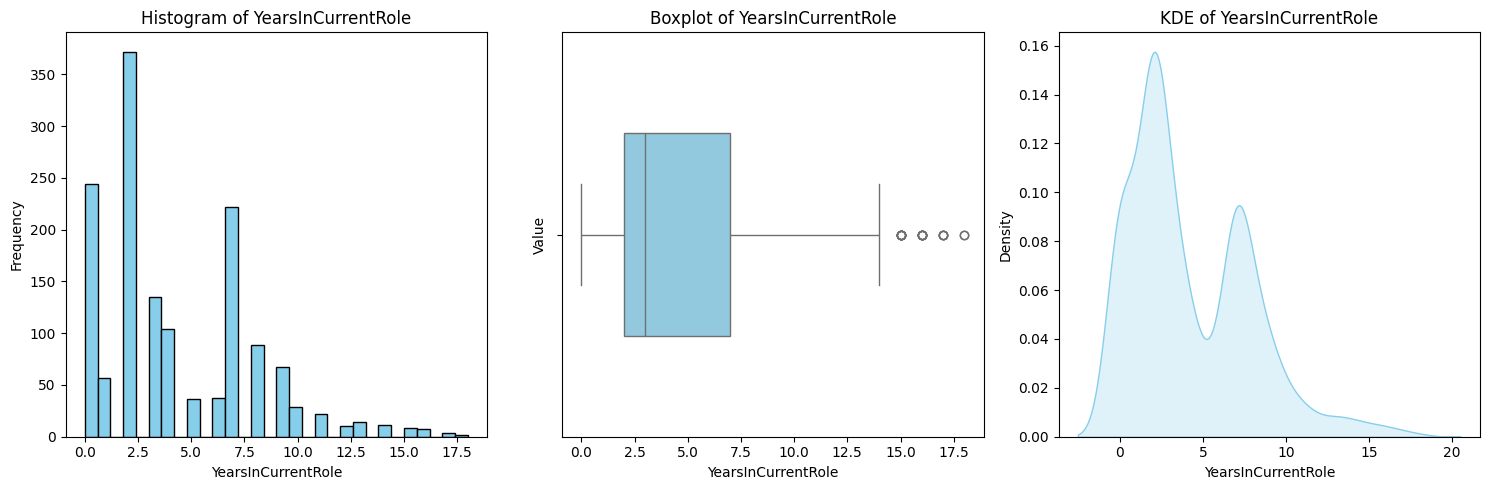

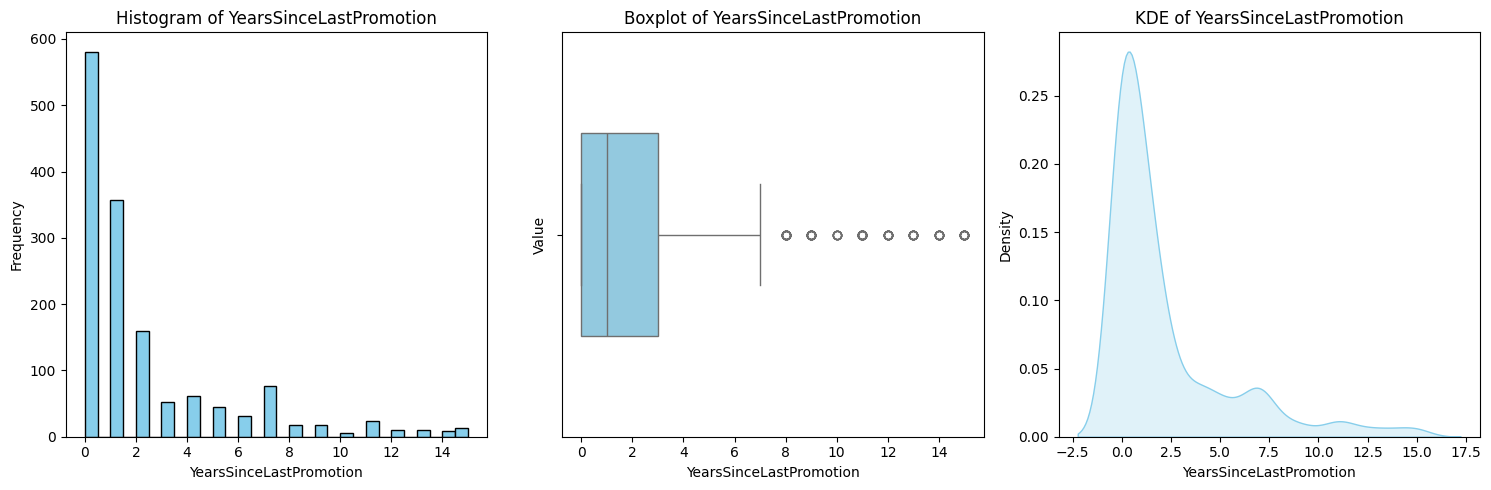

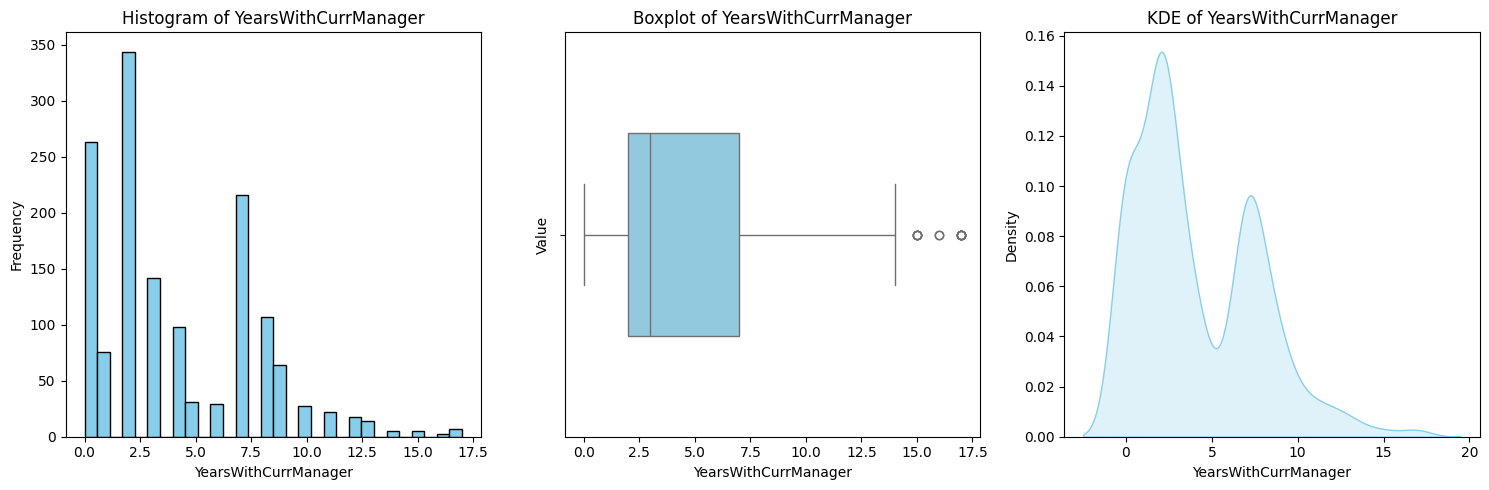

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns
numerical_data = df[num_cols]
for col in numerical_data[1:]:
    plt.figure(figsize=(15, 5))

    # Histogram
    plt.subplot(1, 3, 1)
    df[col].plot.hist(bins=30, color='skyblue', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')

    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=df[col],color='skyblue', width=0.5)
    plt.xlabel(col)
    plt.ylabel('Value')
    plt.title(f'Boxplot of {col}')

    # KDE plot
    plt.subplot(1, 3, 3)
    sns.kdeplot(df[col], color='skyblue', fill=True)
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(f'KDE of {col}')

    plt.tight_layout()
    plt.show()



*   Histogram for Visualize the distribution of column values
*   Boxplot for detecting outliers
*   KDEplot for climax





Bivariate Analysis on numerical columns and Attrition

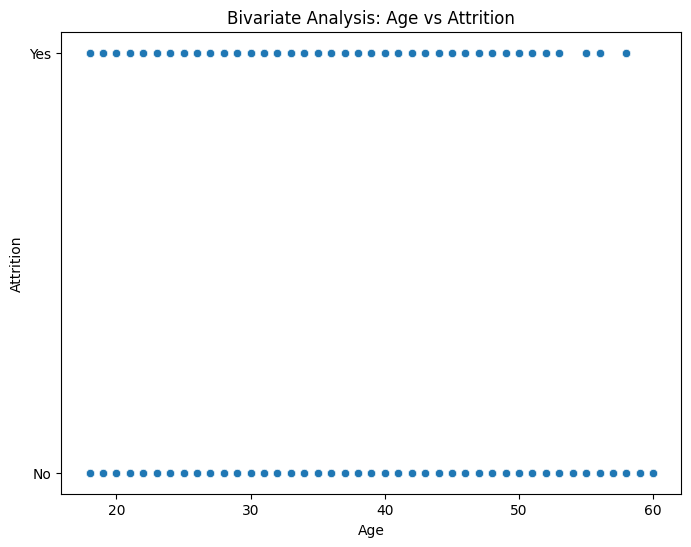

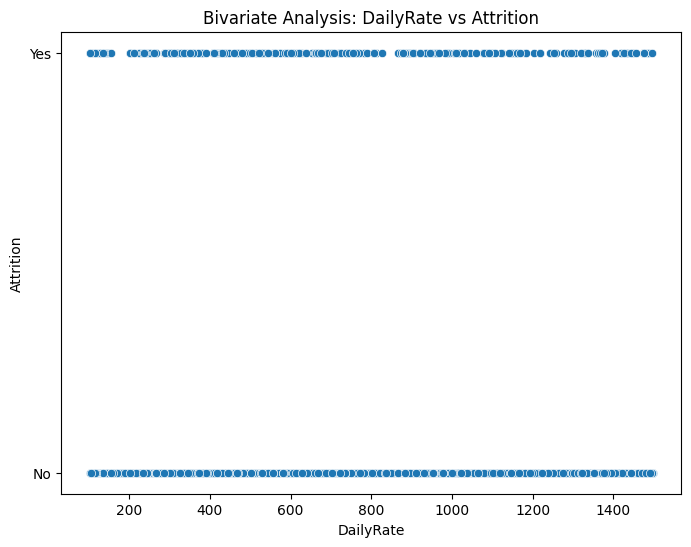

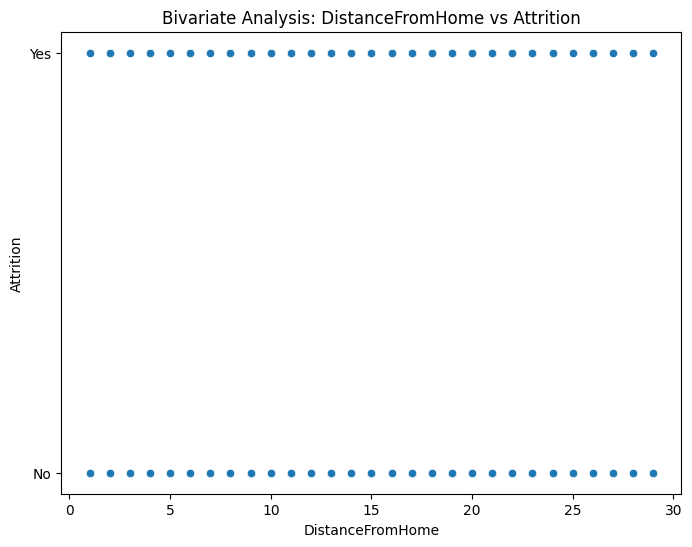

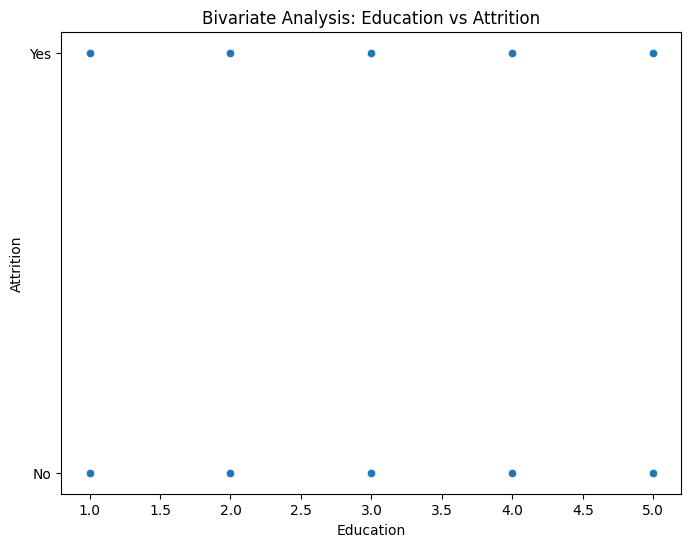

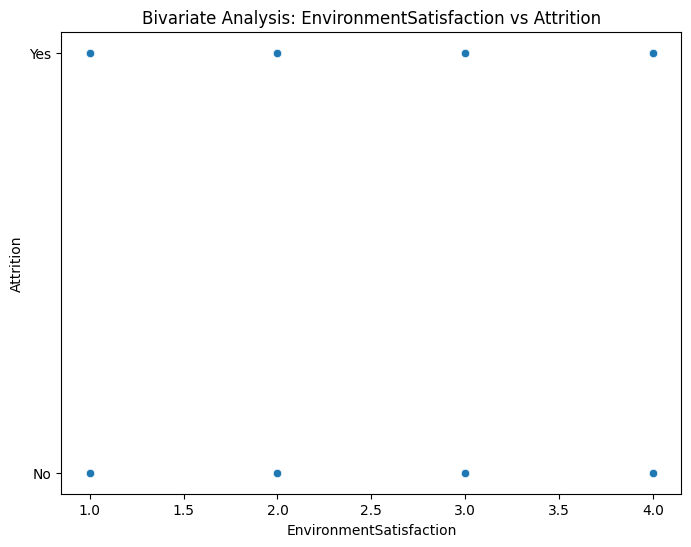

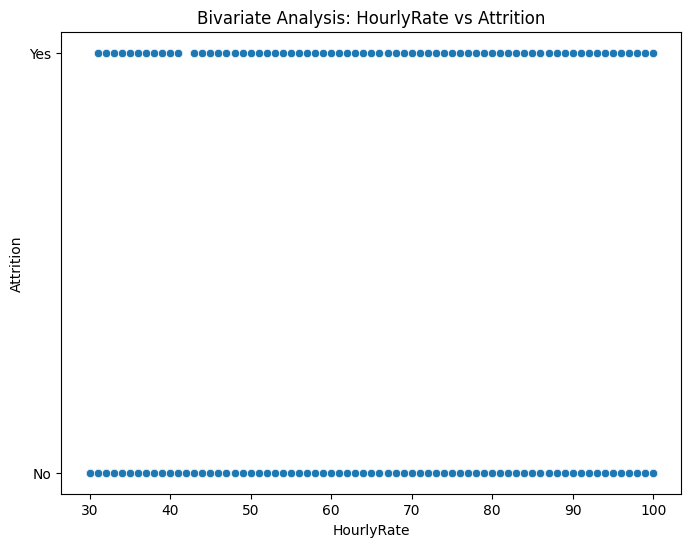

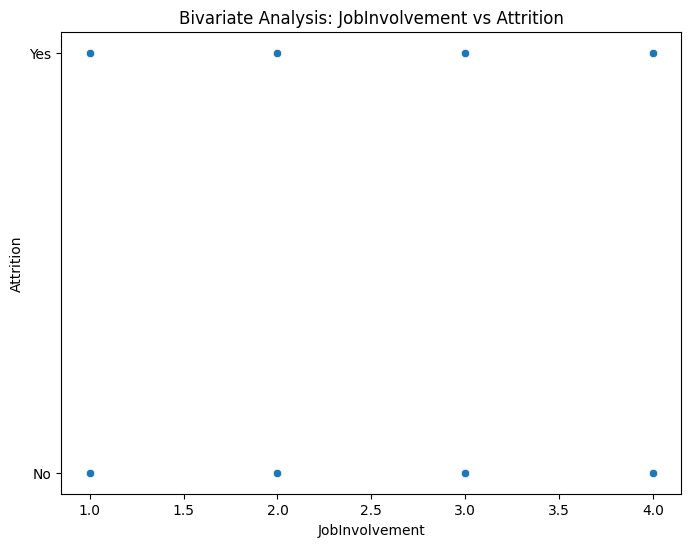

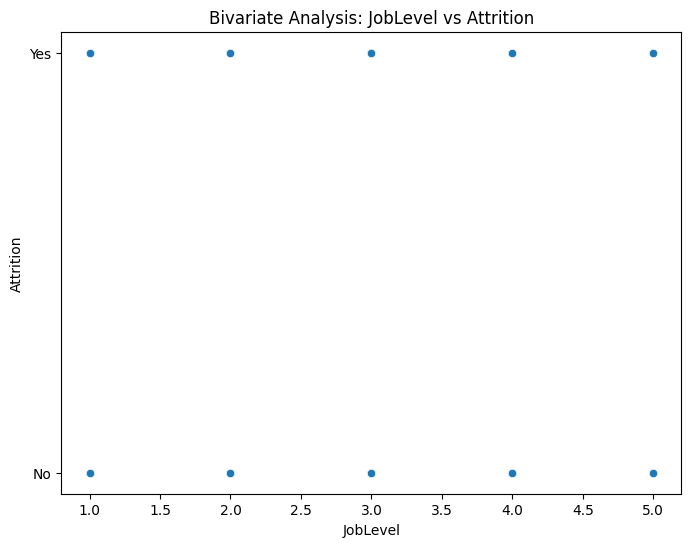

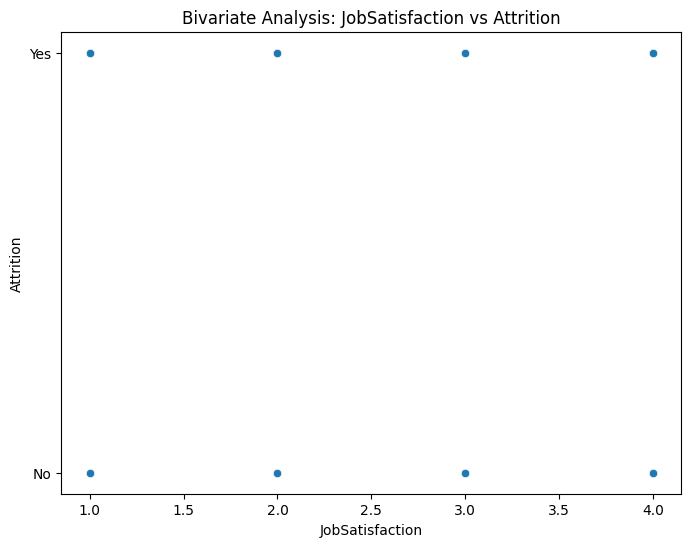

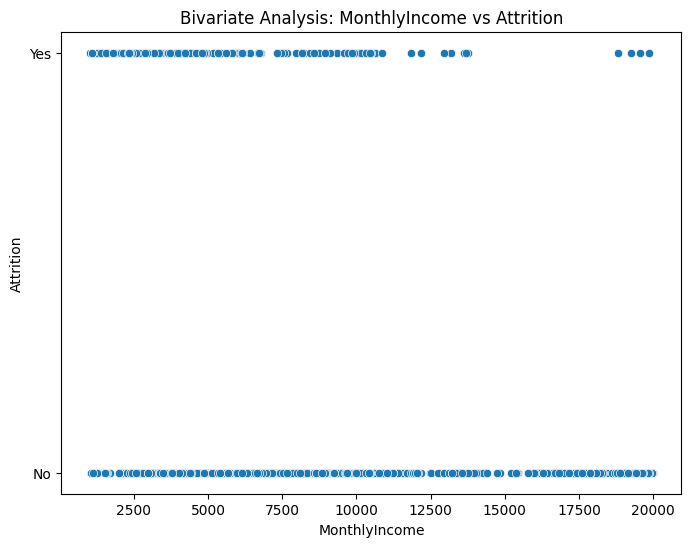

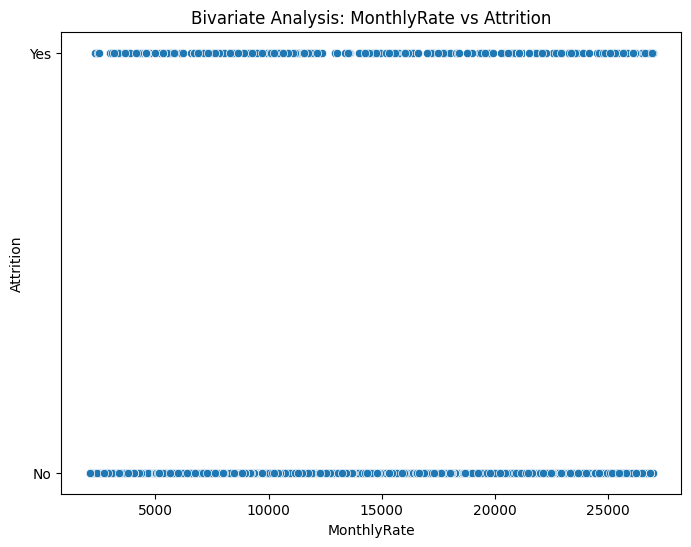

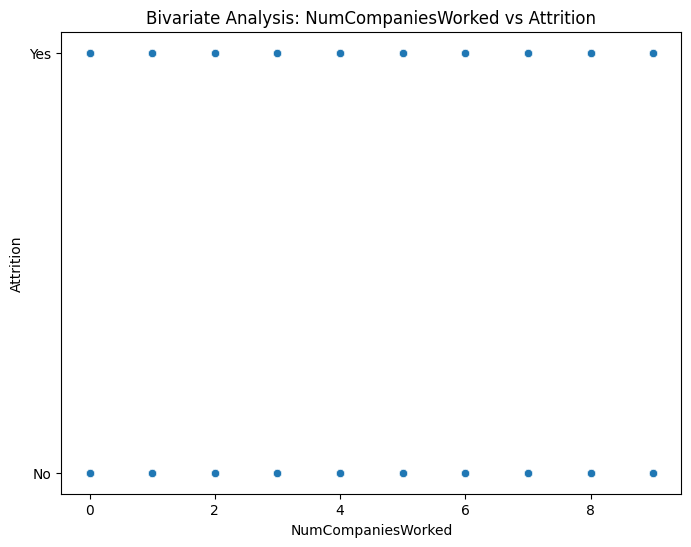

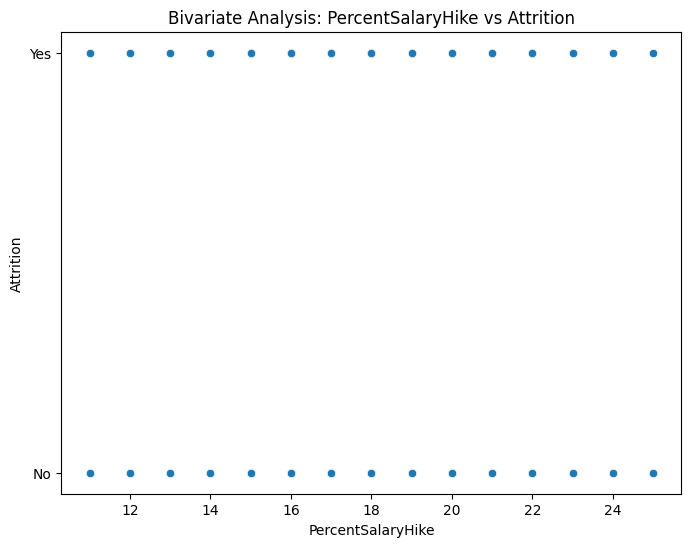

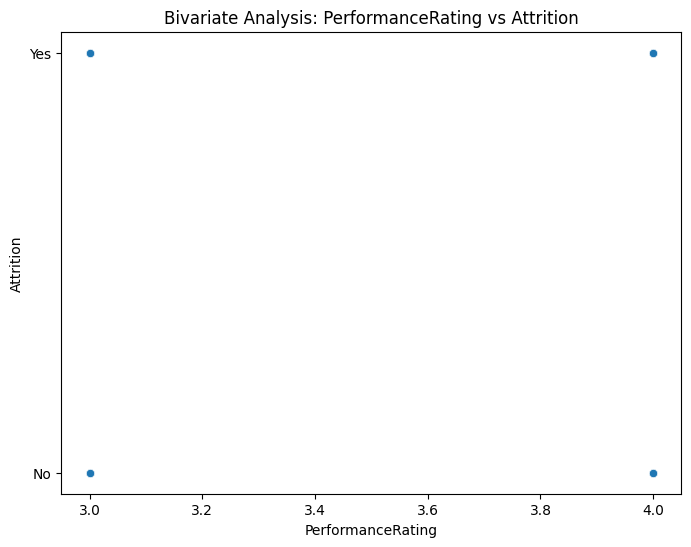

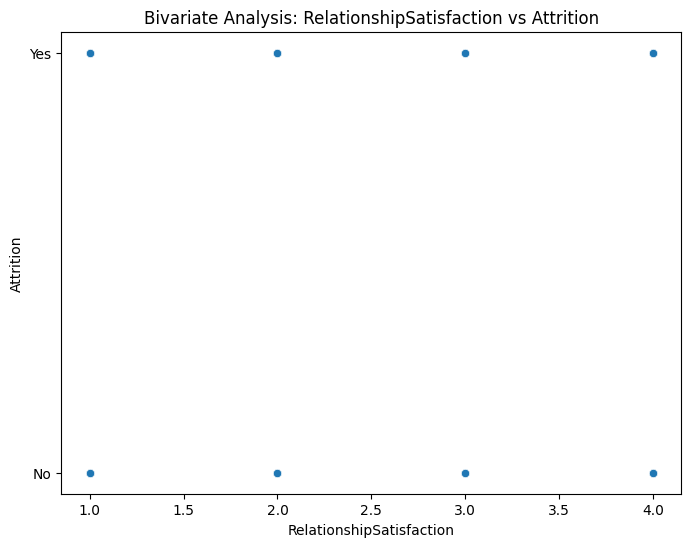

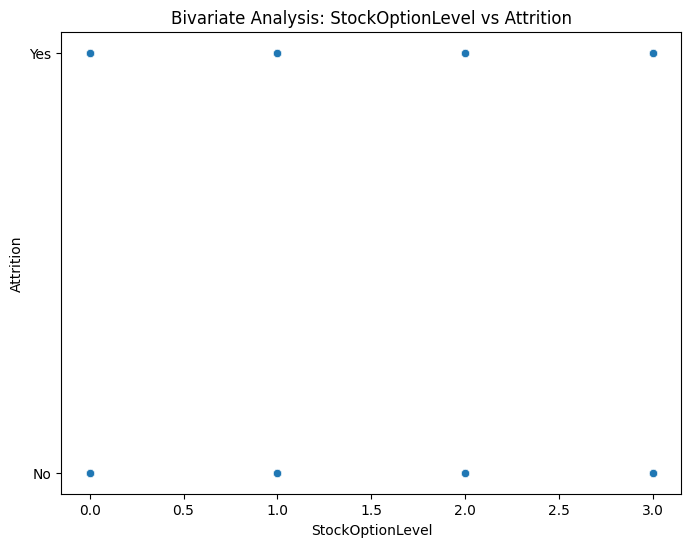

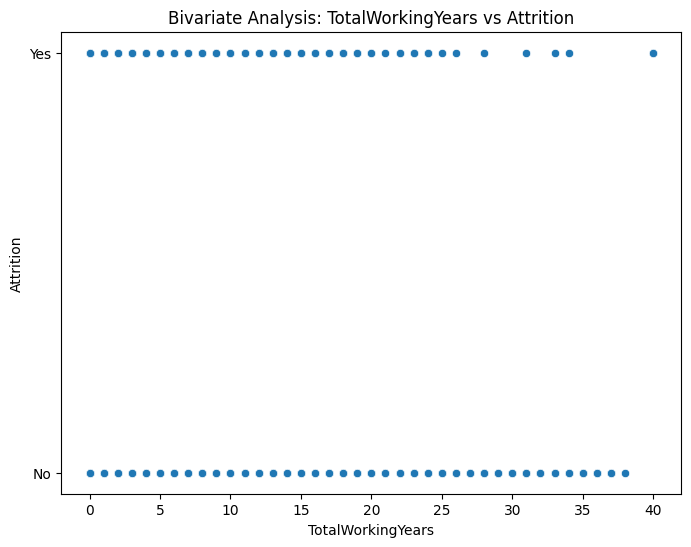

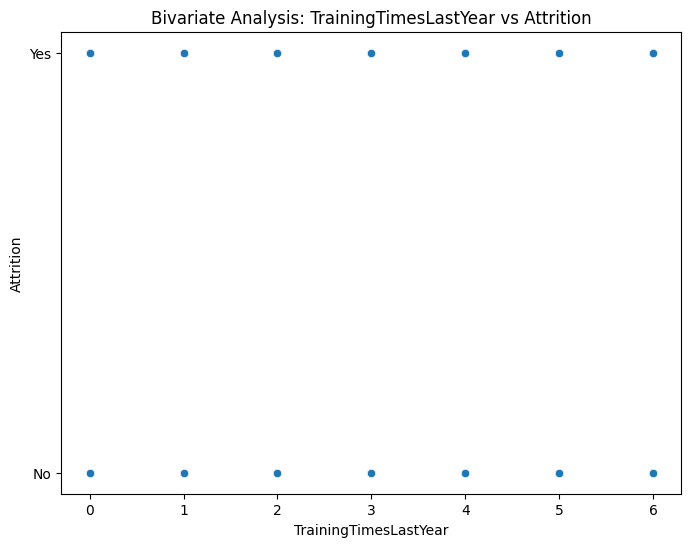

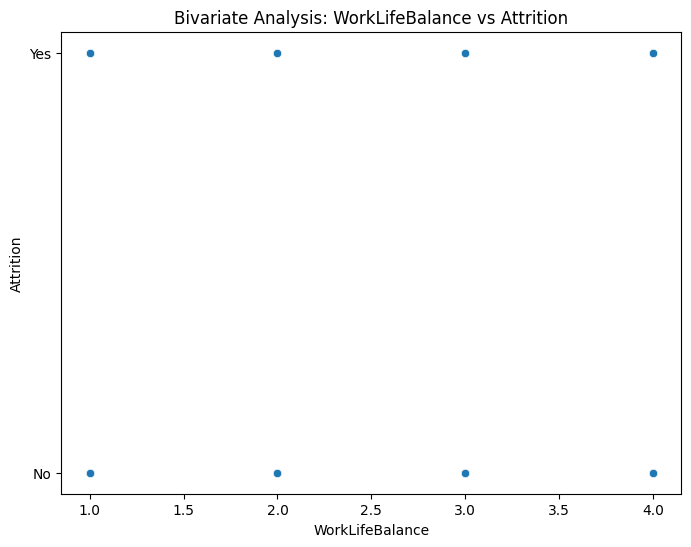

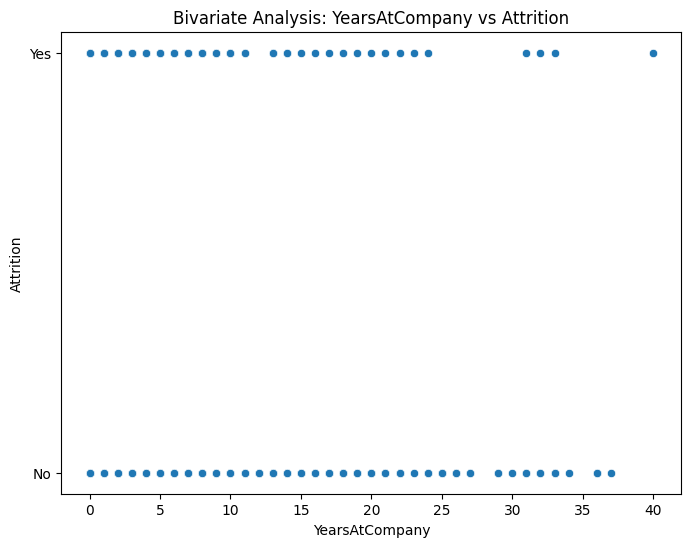

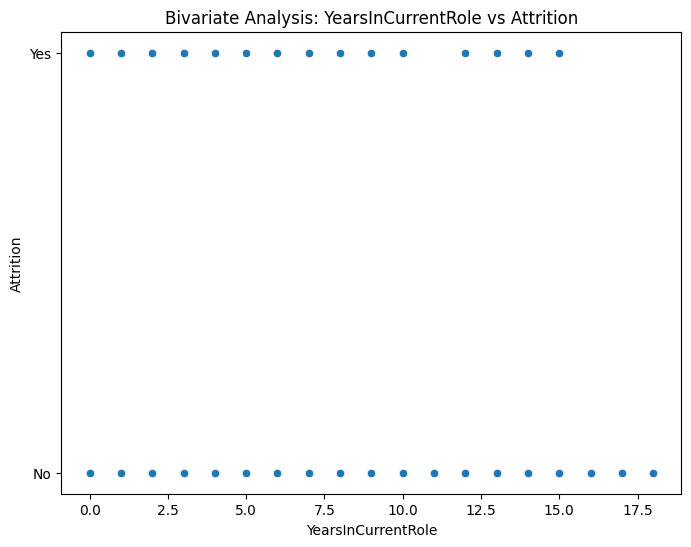

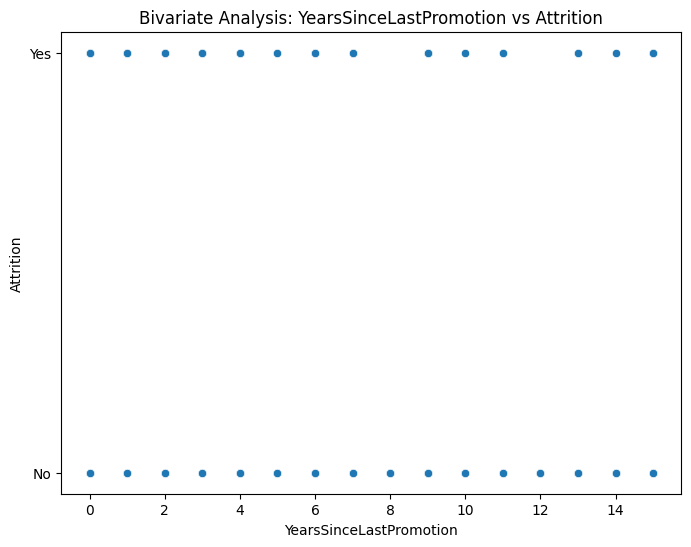

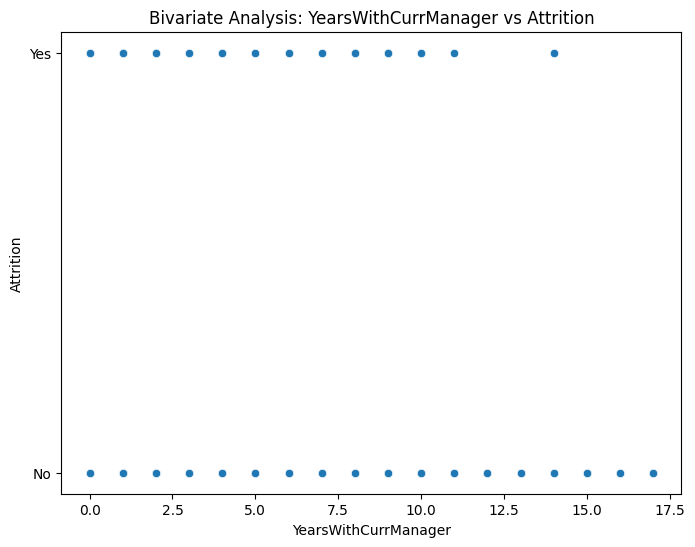

In [ ]:
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=col, y='Attrition', data=df, palette='tab10')
    plt.title(f'Attrition vs {col}')
    plt.xlabel(col)
    plt.ylabel('Attrition')
    plt.title(f'Bivariate Analysis: {col} vs Attrition')

visualize the relationship between each numerical column and the Attrition

Attrition by Age distribution

In [ ]:
fig = px.histogram(df, x='Age', color='Attrition', barmode='group', nbins=20, title='Attrition by Age')
fig.update_layout(xaxis_title='Age', yaxis_title='Count')
fig.show()

We observed that younger employees have a higher attrition rate, and this could indicate that they are more likely to leave the company, possibly for better opportunities or due to lack of experience .

Attritiont by gender

In [ ]:
fig = px.sunburst(df,path=['Gender','Attrition'], title='Gender Distribution')
fig.update_traces(textinfo='label+percent parent')
fig.update_layout(title_x=0.5)
fig.show()

Attrition by job level

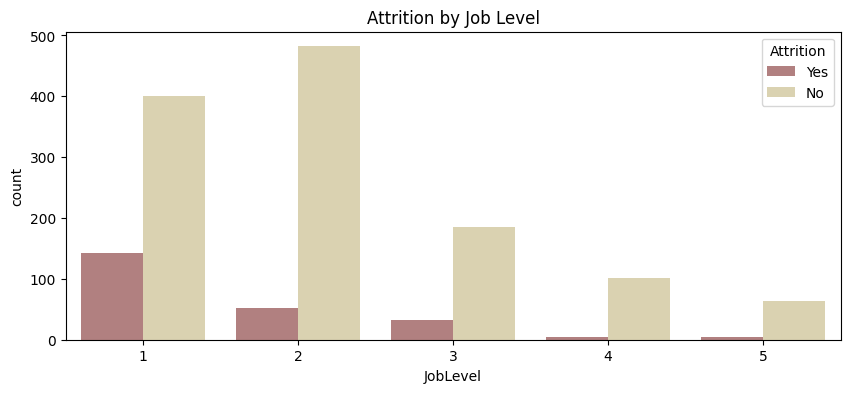

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x="JobLevel", hue="Attrition", data=df, palette='pink')
plt.title("Attrition by Job Level")
plt.show()



*   Higher job levels might be associated with lower attrition rates due to better compensation and job satisfaction.
*   The lower job levels show higher attrition, this may indicate that entry-level employees are more likely to leave.



Attrition by Departments

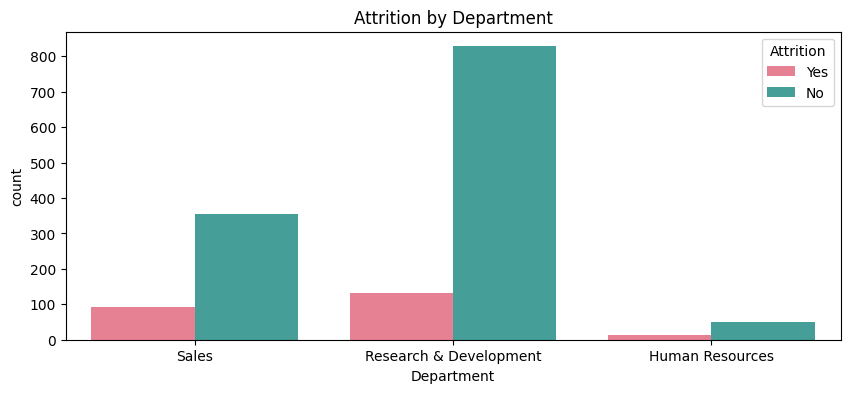

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x="Department", hue="Attrition", data=df, palette ='husl')
plt.title("Attrition by Department")
plt.show()



*   Different departments may have varying attrition rates due to the nature of work, work culture, or management style.
*   The Research & Development department has a significantly higher attrition rate, and this may warrant a deeper investigation into the causes, such as workload, management, or job satisfaction.



Monthly Income by Attrition

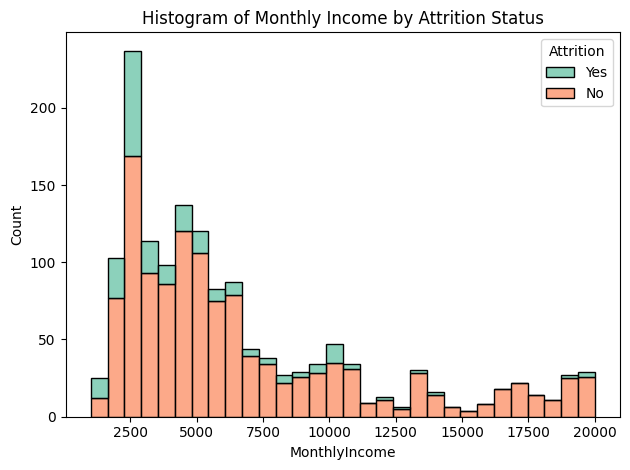

In [ ]:
sns.histplot(data=df, x='MonthlyIncome', hue='Attrition', multiple='stack', bins=30, palette='Set2')
plt.title('Histogram of Monthly Income by Attrition Status')

plt.tight_layout()
plt.show()

*  Income levels may impact an employee’s decision to stay or leave the company. Lower-paid employees might have higher attrition rates.
*  As we can see the attrition is higher among employees with lower incomes, this could suggest that salary increases might help reduce turnover

Relationship between income and experience

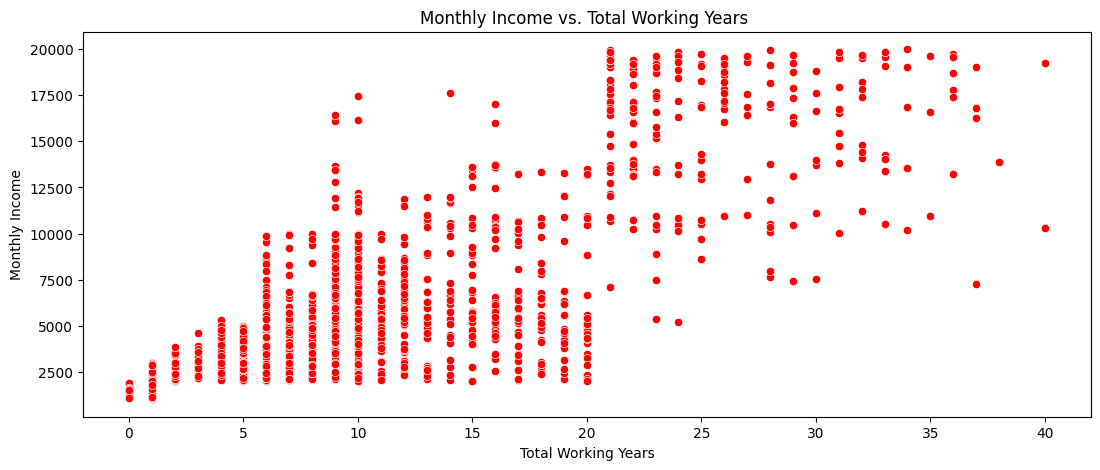

In [ ]:
plt.figure(figsize=(13, 5))

# Monthly Income vs. Total Working Years
sns.scatterplot(x='TotalWorkingYears', y='MonthlyIncome', data=df, c='r')
plt.title('Monthly Income vs. Total Working Years ')
plt.xlabel('Total Working Years')
plt.ylabel('Monthly Income')
plt.show()


This plot allows us to see if more experienced employees (with more working years) tend to earn more, and whether this relationship varies by job role or not..

Data Preprocessing


Outliers

In [ ]:
features_with_outliers = []
for feature in num_cols:
    percentile25 = df[feature].quantile(0.25)
    percentile75 = df[feature].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    outliers = df[(df[feature] > upper_limit) | (df[feature] < lower_limit)]
    proportion_of_outliers = len(outliers) / len(df) * 100
    if len(outliers) > 0:
        features_with_outliers.append(feature)
        print(f"Feature: {feature}")
        print(f"Number of outliers: {len(outliers)}")
        print(f"Proportion of outliers: {proportion_of_outliers:.2f}%\n")

Feature: MonthlyIncome
Number of outliers: 114
Proportion of outliers: 7.76%

Feature: NumCompaniesWorked
Number of outliers: 52
Proportion of outliers: 3.54%

Feature: PerformanceRating
Number of outliers: 226
Proportion of outliers: 15.37%

Feature: StockOptionLevel
Number of outliers: 85
Proportion of outliers: 5.78%

Feature: TotalWorkingYears
Number of outliers: 63
Proportion of outliers: 4.29%

Feature: TrainingTimesLastYear
Number of outliers: 238
Proportion of outliers: 16.19%

Feature: YearsAtCompany
Number of outliers: 104
Proportion of outliers: 7.07%

Feature: YearsInCurrentRole
Number of outliers: 21
Proportion of outliers: 1.43%

Feature: YearsSinceLastPromotion
Number of outliers: 107
Proportion of outliers: 7.28%

Feature: YearsWithCurrManager
Number of outliers: 14
Proportion of outliers: 0.95%



Feature Engineering

In [ ]:
df['WorkExperience'] = df[['TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
                                'YearsSinceLastPromotion', 'YearsWithCurrManager']].mean(axis=1)
df['OverallSatisfaction'] = (
    df[['JobSatisfaction' , 'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance']].mean(axis=1)
)

*  Work Experience: TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, and YearsWithCurrentManager show strong positive correlations. This makes sense because the longer someone works for a company, the longer they stay in the same role and with the same manager.

*  OverallSatisfaction : JobSatisfaction , EnvironmentSatisfaction, RelationshipSatisfaction and WorkLifeBalance

In [ ]:
df=df.drop(['TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
            'YearsSinceLastPromotion', 'JobSatisfaction' , 'EnvironmentSatisfaction',
            'RelationshipSatisfaction', 'WorkLifeBalance'],axis=1)

Categorical Encoding

In [ ]:
cat_cols = df.select_dtypes(include = ['object'])

In [ ]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()
categorical_cols = cat_cols
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,Gender,HourlyRate,...,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TrainingTimesLastYear,YearsWithCurrManager,WorkExperience,OverallSatisfaction
0,41,1,2,1102,2,1,2,1,0,94,...,19479,8,1,11,3,0,0,5,4.6,2.00
1,49,0,1,279,1,8,1,1,1,61,...,24907,1,0,23,4,1,3,7,7.0,3.00
2,37,1,2,1373,1,2,2,4,1,92,...,2396,6,1,15,3,0,3,0,1.4,3.00
3,33,0,1,1392,1,3,4,1,0,56,...,23159,1,1,11,3,0,3,0,5.2,3.25
4,27,0,2,591,1,2,1,3,1,40,...,16632,9,0,12,3,1,3,2,2.8,2.50


In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel',
       'TrainingTimesLastYear', 'YearsWithCurrManager', 'WorkExperience',
       'OverallSatisfaction'],
      dtype='object')

Splitting

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Attrition', axis=1)  # Selecting all columns except the target
y = df['Attrition']                # Selecting the target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1176, 24)
X_test shape: (294, 24)
y_train shape: (1176,)
y_test shape: (294,)


Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Solve imbalance data problem

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
print("Before Smoote" , y_train.value_counts())

X_train, y_train = smote.fit_resample(X_train, y_train)

print("\n After Smoote" , y_train.value_counts())

Before Smoote Attrition
0    986
1    190
Name: count, dtype: int64

 After Smoote Attrition
0    986
1    986
Name: count, dtype: int64


Modeling

**1)  LogisticRegression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

# Create a Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)
y_train_predict = model.predict(X_train)

# Make predictions on the test data

y_test_predict = model.predict(X_test)

In [ ]:
# Classification Report
print("=================================================================================================")
print("Classification Report for Logistic Regression Model (Train Set):")
print(classification_report(y_train, y_train_predict))

print("=================================================================================================")
print("Classification Report for Logistic Regression Model (Test Set):")
print(classification_report(y_test, y_test_predict))

Classification Report for Logistic Regression Model (Train Set):
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       986
           1       0.77      0.78      0.78       986

    accuracy                           0.77      1972
   macro avg       0.77      0.77      0.77      1972
weighted avg       0.77      0.77      0.77      1972

Classification Report for Logistic Regression Model (Test Set):
              precision    recall  f1-score   support

           0       0.93      0.75      0.83       247
           1       0.34      0.68      0.46        47

    accuracy                           0.74       294
   macro avg       0.63      0.72      0.64       294
weighted avg       0.83      0.74      0.77       294



<Axes: >

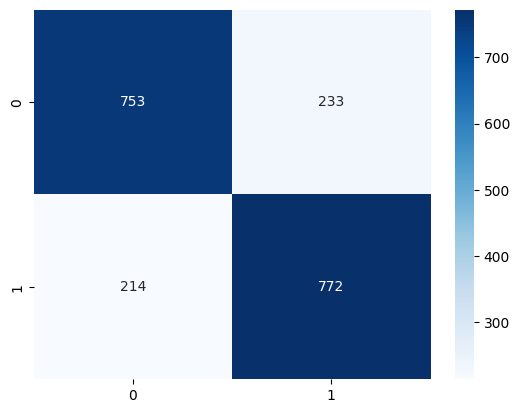

In [ ]:
cm = confusion_matrix(y_train, y_train_predict)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='.0f')

**2) KNN**

In [ ]:
# Create a K-Nearest Neighbors model (with 5 neighbors, you can adjust this value)
model = KNeighborsClassifier(n_neighbors=10, weights='uniform', algorithm='auto',
                             leaf_size=50, p=2, metric='minkowski', metric_params=None, n_jobs=None)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the training data
y_train_predict = model.predict(X_train)

# Make predictions on the test data
y_test_predict = model.predict(X_test)

In [ ]:
# Classification Report for Train Set
print("=================================================================================================")
print("Classification Report for KNN Model (Train Set):")
print(classification_report(y_train, y_train_predict))

# Classification Report for Test Set
print("=================================================================================================")
print("Classification Report for KNN Model (Test Set):")
print(classification_report(y_test, y_test_predict))

Classification Report for KNN Model (Train Set):
              precision    recall  f1-score   support

           0       0.97      0.69      0.80       986
           1       0.76      0.98      0.85       986

    accuracy                           0.83      1972
   macro avg       0.86      0.83      0.83      1972
weighted avg       0.86      0.83      0.83      1972

Classification Report for KNN Model (Test Set):
              precision    recall  f1-score   support

           0       0.89      0.64      0.75       247
           1       0.24      0.60      0.34        47

    accuracy                           0.63       294
   macro avg       0.57      0.62      0.54       294
weighted avg       0.79      0.63      0.68       294



<Axes: >

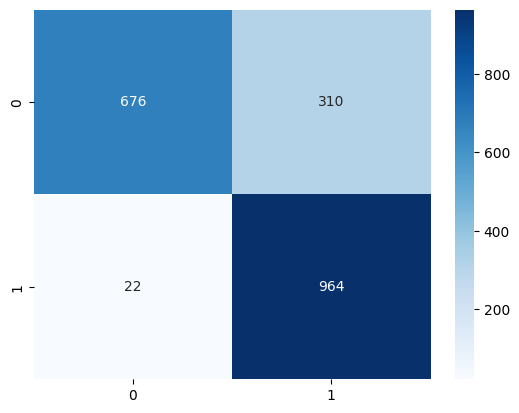

In [ ]:
cm = confusion_matrix(y_train, y_train_predict)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='.0f')

**3) SVM**

In [ ]:
# Create a SVM model
model = SVC(C=200.0, kernel='rbf', degree=5, gamma='scale', coef0=2, shrinking=True,
            probability=False, tol=0.1, cache_size=200, class_weight=None, verbose=False, max_iter=-1,
            decision_function_shape='ovr', break_ties=False, random_state=None)

# Train the model
model.fit(X_train, y_train)
y_train_predict = model.predict(X_train)

# Make predictions on the test data

y_test_predict = model.predict(X_test)

In [ ]:
# Classification Report for Train Set
print("=================================================================================================")
print("Classification Report for SVM Model (Train Set):")
print(classification_report(y_train, y_train_predict))

# Classification Report for Test Set
print("=================================================================================================")
print("Classification Report for SVM Model (Test Set):")
print(classification_report(y_test, y_test_predict))

Classification Report for SVM Model (Train Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       986
           1       1.00      1.00      1.00       986

    accuracy                           1.00      1972
   macro avg       1.00      1.00      1.00      1972
weighted avg       1.00      1.00      1.00      1972

Classification Report for SVM Model (Test Set):
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       247
           1       0.41      0.32      0.36        47

    accuracy                           0.82       294
   macro avg       0.64      0.62      0.62       294
weighted avg       0.80      0.82      0.81       294



<Axes: >

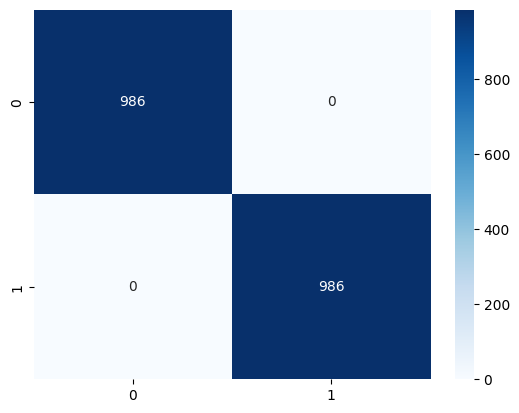

In [ ]:
cm = confusion_matrix(y_train, y_train_predict)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='.0f')

**4) GaussianNB**

In [ ]:
model = GaussianNB()

model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)

# Make predictions on the test data

y_test_predict = model.predict(X_test)

In [ ]:
# Classification Report for Train Set
print("=================================================================================================")
print("Classification Report for GaussianNB Model (Train Set):")
print(classification_report(y_train, y_train_predict))

# Classification Report for Test Set
print("=================================================================================================")
print("Classification Report for GaussianNB Model (Test Set):")
print(classification_report(y_test, y_test_predict))

Classification Report for GaussianNB Model (Train Set):
              precision    recall  f1-score   support

           0       0.76      0.65      0.70       986
           1       0.69      0.80      0.74       986

    accuracy                           0.72      1972
   macro avg       0.73      0.72      0.72      1972
weighted avg       0.73      0.72      0.72      1972

Classification Report for GaussianNB Model (Test Set):
              precision    recall  f1-score   support

           0       0.92      0.58      0.71       247
           1       0.25      0.74      0.38        47

    accuracy                           0.61       294
   macro avg       0.59      0.66      0.54       294
weighted avg       0.82      0.61      0.66       294



<Axes: >

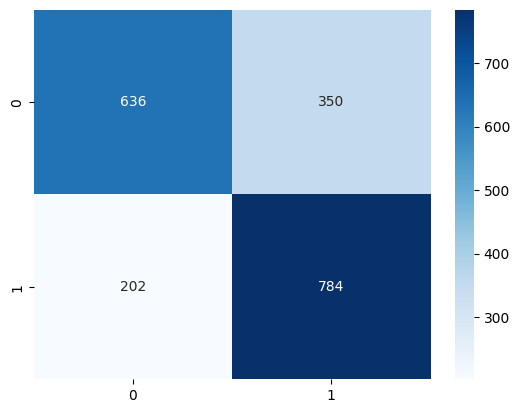

In [ ]:
cm = confusion_matrix(y_train, y_train_predict)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='.0f')

**5) DecisionTreeClassifier**

In [ ]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)

model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)

# Make predictions on the test data

y_test_predict = model.predict(X_test)

In [ ]:
# Classification Report for Train Set
print("=================================================================================================")
print("Classification Report for DecisionTreeClassifier Model (Train Set):")
print(classification_report(y_train, y_train_predict))

# Classification Report for Test Set
print("=================================================================================================")
print("Classification Report for DecisionTreeClassifier Model (Test Set):")
print(classification_report(y_test, y_test_predict))

Classification Report for DecisionTreeClassifier Model (Train Set):
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       986
           1       0.88      0.82      0.85       986

    accuracy                           0.85      1972
   macro avg       0.85      0.85      0.85      1972
weighted avg       0.85      0.85      0.85      1972

Classification Report for DecisionTreeClassifier Model (Test Set):
              precision    recall  f1-score   support

           0       0.90      0.81      0.86       247
           1       0.35      0.53      0.42        47

    accuracy                           0.77       294
   macro avg       0.63      0.67      0.64       294
weighted avg       0.81      0.77      0.79       294



<Axes: >

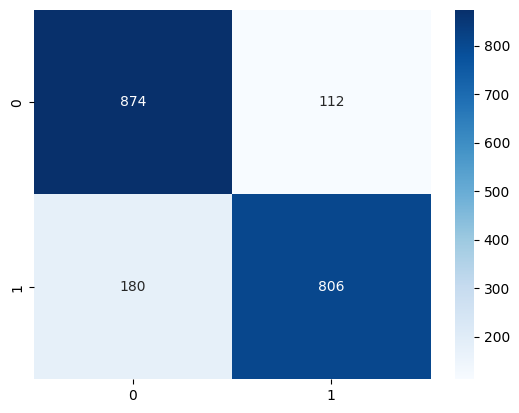

In [ ]:
cm = confusion_matrix(y_train, y_train_predict)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='.0f')

**Conclusion :** In this analysis, we explored the dataset and aimed to extract informative insights through various techniques and machine learning models like, Logistic Regression, KNN, SVM Classification, Gaussian Naive Bayes, Decision tree.

We applied StandardScaler to normalize the features, ensuring consistency and improving model performance.
To handle data imbalance, we used SMOTE (Synthetic Minority Over-sampling Technique), which helped to generate synthetic samples for the minority class, providing a more balanced dataset for training.
We trained 5 different classifiers, including logistic regression, decision trees, random forests, and others, to predict employee attrition. Each model’s performance was evaluated to identify the best-performing classifier for this specific dataset.

| Model |	Train Accuracy |	Test Accuracy|
|--|--|--|
|Logistic Regression	|0.81	|0.87
|KNN	|0.88	|0.84
|SVM	|0.98	|0.86
|GaussianNB	|0.78	|0.80
|Decision Tree	|0.84	|0.83

**Logistic Regression:** Provides a good balance between accuracy and interpretability. It's a simple model and performs relatively well on this dataset.

**KNN:** Achieves decent accuracy but can be computationally expensive for large datasets. Its performance depends on the choice of the number of neighbors (k).

**SVM:** Has the potential for high accuracy, but can be sensitive to parameter tuning. It's effective in high-dimensional spaces.

**GaussianNB:** A simple and fast model, but its assumption of feature independence might not hold true for all datasets.

**Decision Tree:** Easy to interpret and visualize, but prone to overfitting if not pruned properly. It can capture non-linear relationships in the data.

Based on the accuracies, Logistic Regression appears to be the best-performing model for this particular dataset, achieving the highest test accuracy (0.87). However, other models like SVM and KNN also show competitive performance. The choice of the best model depends on the specific requirements of the task, such as interpretability, computational cost, and the desired level of accuracy.